In [1]:
from utils import init_data, lemmatization
import spacy

data, ref_word = init_data()

/home/ycliu/.conda/envs/FF/lib/python3.9/site-packages/torch/cuda/__init__.py:628: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
import spacy

# Get difficulty of each question and append it into data
_ref_word = list(ref_word['單字'])
model = spacy.load('en_core_web_sm')
for qa_pair in data:
    answer_word = lemmatization(qa_pair["correct_option_en"], language_model=model)
    dis = qa_pair['distractors']
    if answer_word in _ref_word:
        index = _ref_word.index(answer_word)
        ans_hardness = list(ref_word['難度'])[index]
        qa_pair["answer_difficulty"] = ans_hardness
    else:
        qa_pair["answer_difficulty"] = None

In [3]:
def classify_correct_rate_based_on_difficulty(data, level):
    target = level+"_option_correct"
    correctRate_plot_data = {'1':[],'2':[],'3':[],'4':[],'5':[],'6':[]}
    for i in data:
        if i['answer_difficulty'] is not None:
            correctRate_plot_data[str(int(i['answer_difficulty']))].append(i[target])

    # for key,value in correctRate_plot_data.items():
    #     correctRate_plot_data[key] = sum(value)/len(value)
    return correctRate_plot_data

In [4]:
total_correct_rate_data = classify_correct_rate_based_on_difficulty(data, "t")
strong_student_correct_rate_data = classify_correct_rate_based_on_difficulty(data, "h")
weak_student_correct_rate_data = classify_correct_rate_based_on_difficulty(data, "l")

In [5]:
print(total_correct_rate_data)
ll = {}
for i, j in total_correct_rate_data.items():
    ll[i] = sum(j)/len(j)

{'1': [61, 65, 85, 72, 66, 62, 42, 41], '2': [69, 76, 76, 80, 78, 68, 50, 44, 65, 80, 67, 80, 65, 68, 57, 80, 46, 63, 48, 30, 62, 47, 45], '3': [76, 76, 48, 63, 65, 66, 69, 64, 58, 81, 23, 70, 78, 66, 58, 56, 42, 73, 61, 75, 63, 32, 75, 72, 87, 69, 63, 57, 62, 56, 68, 59, 33, 54, 49, 56, 77, 31, 60, 48, 36, 71, 60, 55, 72, 61, 54, 46, 40, 36, 51, 68, 51, 66], '4': [57, 67, 65, 71, 63, 74, 52, 64, 71, 78, 63, 50, 78, 58, 69, 54, 40, 56, 55, 56, 69, 51, 41, 52, 58, 64, 67, 32, 73, 74, 49, 69, 80, 79, 58, 59, 69, 44, 50, 64, 49, 63, 46, 64, 75, 73, 79, 55, 77, 81, 75, 56, 57, 79, 69, 47, 68, 75, 36, 63, 72, 60, 58, 65, 52, 50, 58, 51, 58, 58, 43, 47, 33, 59, 38, 59, 35, 48, 52, 47, 57, 50, 38, 43, 52, 79, 51, 56, 67], '5': [59, 56, 39, 41, 65, 40, 54], '6': [60, 59]}


In [6]:
# Prepare the data
x_factor = []
y_factor = []

for key, values in total_correct_rate_data.items():
    x_factor.extend([int(key)] * len(values))
    y_factor.extend(values)

# Calculate the Pearson correlation coefficient
# correlation_coefficient, p_value = pearsonr(x_factor, y_factor)
# print(x_factor)
# print(y_factor)
# print(f"Pearson correlation coefficient: {correlation_coefficient}")
# print(f"P-value: {p_value}")


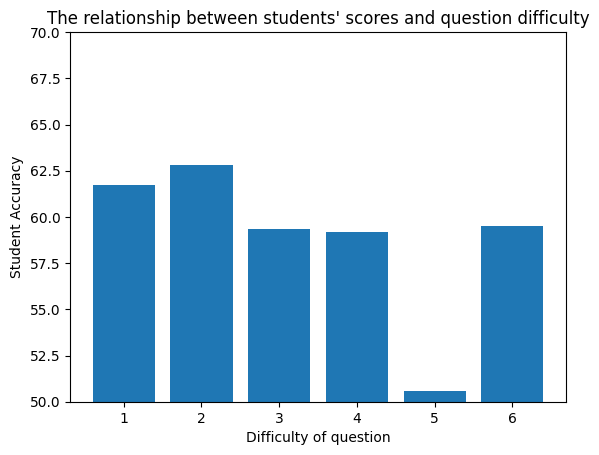

In [8]:
# 圖: 題目難度與該難度下的學生平均答對率

from utils import draw_plot

draw_plot(ll, title="The relationship between students' scores and question difficulty", x_label = "Difficulty of question", y_label="Student Accuracy", ylim = [50, 70])
# draw_plot(strong_student_correct_rate_data, title="Ph student accuracy of exam", x_label = "difficulty", y_label="Student Accuracy", ylim = [0, 100])
# draw_plot(weak_student_correct_rate_data, title="Pl student accuracy of exam", x_label = "difficulty", y_label="Student Accuracy", ylim = [0, 100])


In [9]:
import numpy as np
from scipy.stats import pearsonr

# Sample data: scores of students in two subjects
subject_1_scores = [85, 78, 92, 88, 76, 95, 89, 84, 91, 77]
subject_2_scores = [82, 79, 88, 86, 75, 92, 90, 83, 89, 80]

# Calculate Pearson correlation coefficient and the p-value
correlation_coefficient, p_value = pearsonr(subject_1_scores, subject_2_scores)

print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

ModuleNotFoundError: No module named 'scipy'

# 結論
- 題目的難易度與學生的答對率並無影響